<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. TUGAS PRAKTIKUM **

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.
Kemudian import folder yang ada di Drive dengan cara sebagai berikut.

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

In [ ]:
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'
img = cv.imread(image_path)

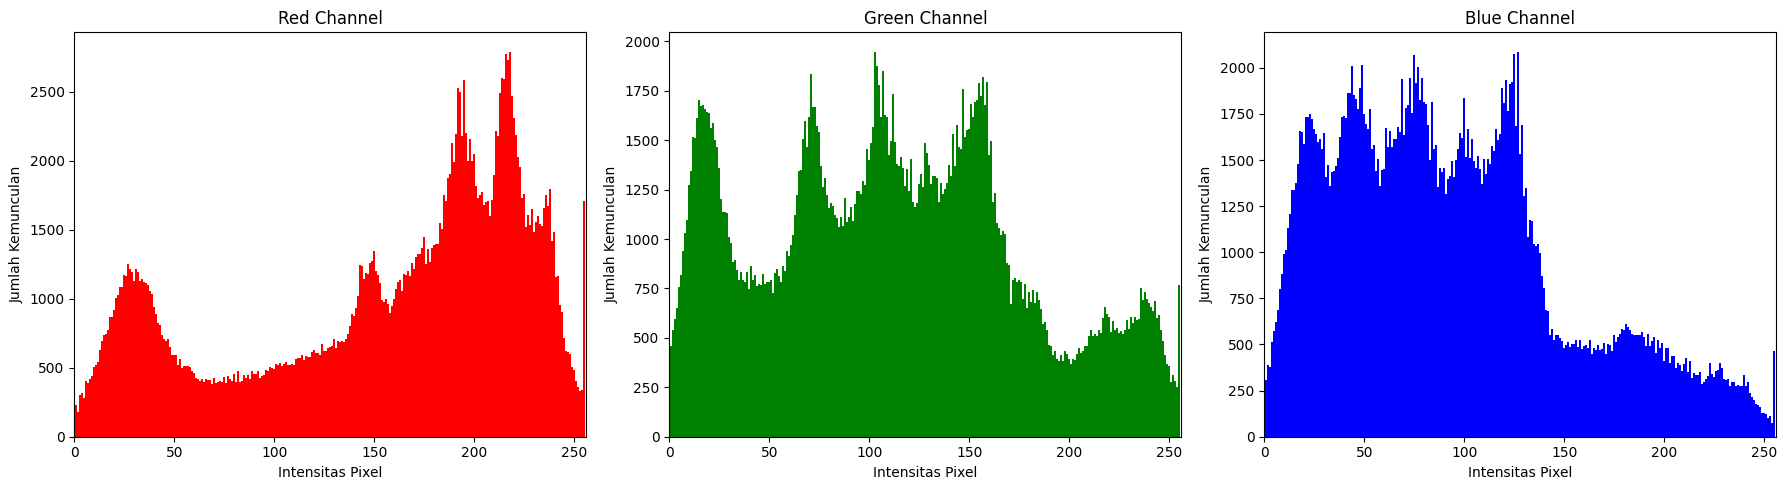

In [ ]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Langkah 3: Menghitung histogram untuk setiap kanal (R, G, B)
colors = ('r', 'g', 'b')  # Kanal warna dalam urutan RGB
color_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Langkah 4: Membuat plot untuk histogram balok untuk setiap kanal
plt.figure(figsize=(18, 5))  # Mengatur ukuran gambar

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)  # Membuat 3 subplot terpisah
    hist = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.bar(np.arange(256), hist[:, 0], color=color, width=1.0)
    plt.title(color_titles[i])
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Jumlah Kemunculan')

# Menampilkan hasil
plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

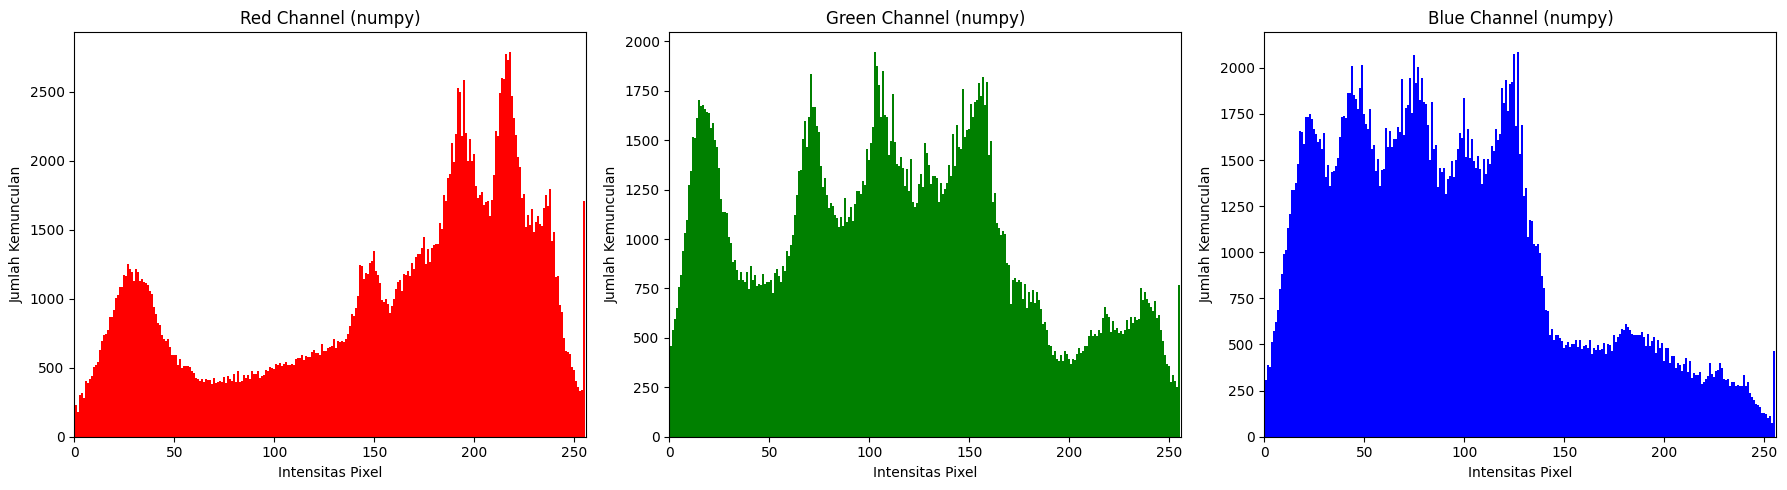

In [ ]:
# Langkah 5: Menghitung histogram untuk setiap kanal (R, G, B) menggunakan numpy

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)  # Subplot untuk histogram R menggunakan numpy
hist_np_r, bins_r = np.histogram(img_rgb[:, :, 0], bins=256, range=(0, 256))
plt.bar(bins_r[:-1], hist_np_r, color='r', width=1.0)
plt.title('Red Channel (numpy)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 2)  # Subplot untuk histogram G menggunakan numpy
hist_np_g, bins_g = np.histogram(img_rgb[:, :, 1], bins=256, range=(0, 256))
plt.bar(bins_g[:-1], hist_np_g, color='g', width=1.0)
plt.title('Green Channel (numpy)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 3)  # Subplot untuk histogram B menggunakan numpy
hist_np_b, bins_b = np.histogram(img_rgb[:, :, 2], bins=256, range=(0, 256))
plt.bar(bins_b[:-1], hist_np_b, color='b', width=1.0)
plt.title('Blue Channel (numpy)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan hasil
plt.tight_layout()
plt.show()

Output yang dihasilkan oleh kedua metode diatas memiliki hasil yang sama

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

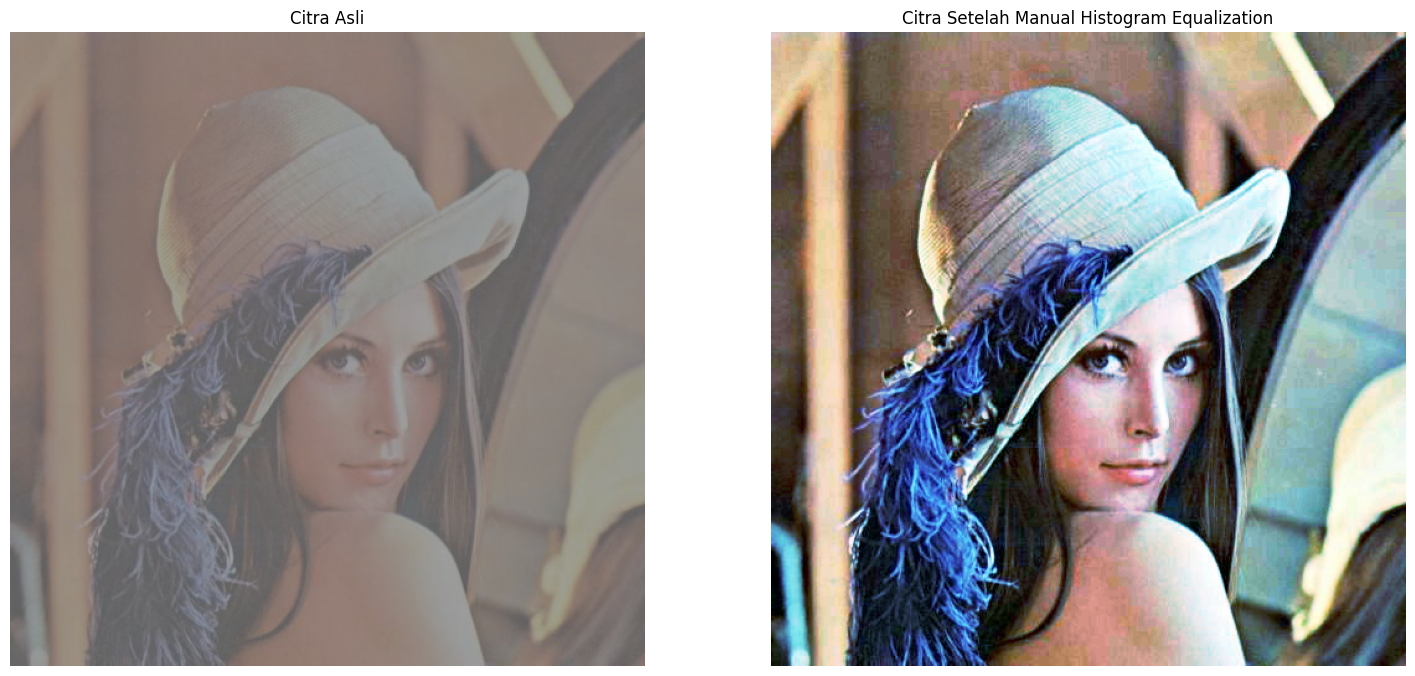

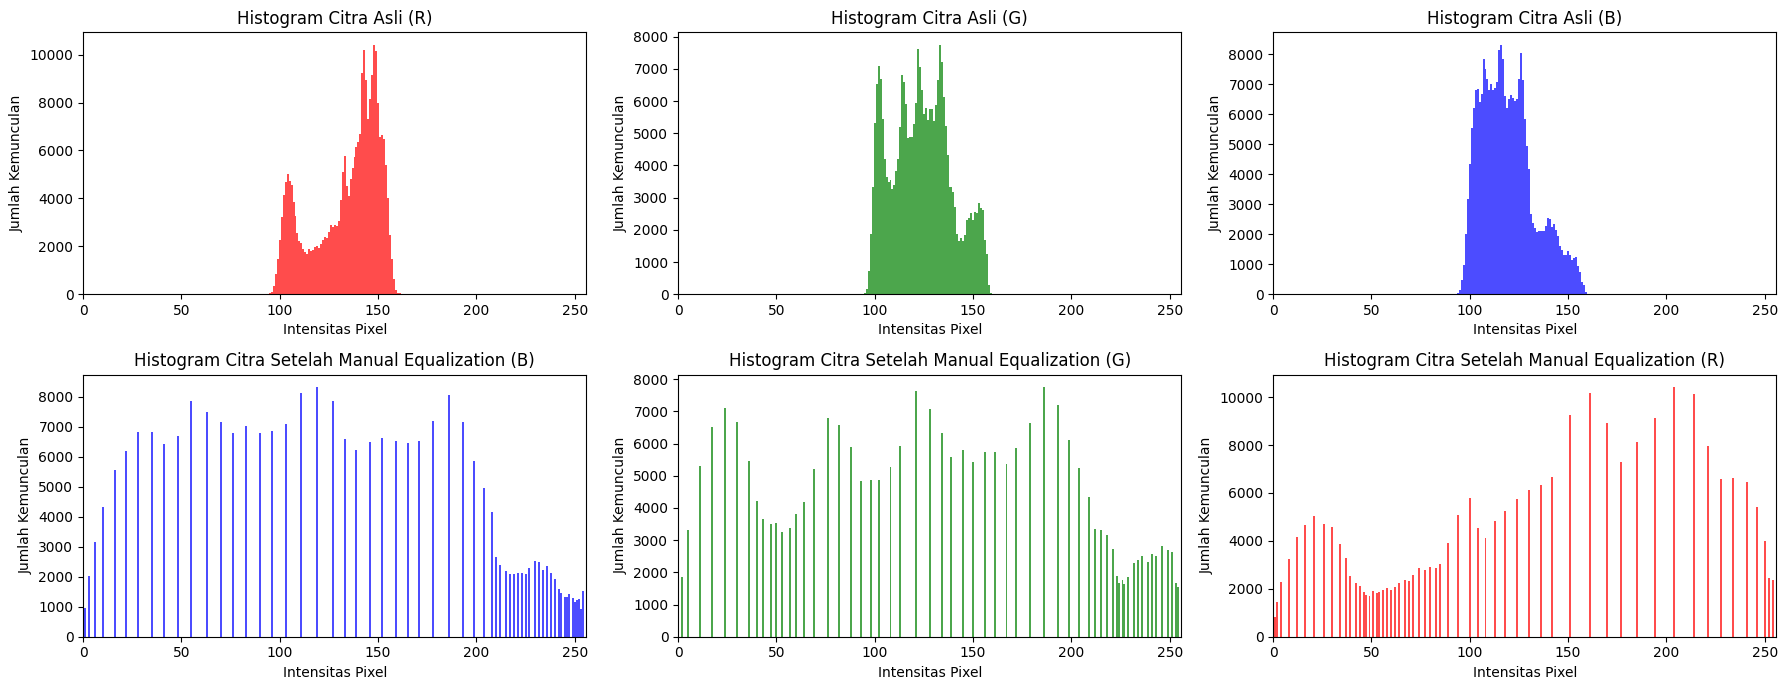

In [ ]:
def manual_histogram_equalization(channel):
    # Hitung histogram
    hist = np.histogram(channel.flatten(), bins=256, range=[0, 256])[0]

    # Hitung kumulatif histogram
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())  # Normalisasi ke rentang [0, 255]

    # Menerapkan transformasi ke channel
    channel_equalized = cdf_normalized[channel].astype(np.uint8)
    return channel_equalized

# Langkah 1: Memuat citra 'lena_lc.jpg' dalam format warna
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg'
img = cv.imread(image_path)  # Membaca citra dalam format warna (BGR)

# Langkah 2: Menghitung histogram untuk citra asli
colors = ('b', 'g', 'r')  # Kanal warna (BGR)
hist_original_b = np.histogram(img[:, :, 0], bins=256, range=(0, 256))[0]  # Histogram untuk saluran biru
hist_original_g = np.histogram(img[:, :, 1], bins=256, range=(0, 256))[0]  # Histogram untuk saluran hijau
hist_original_r = np.histogram(img[:, :, 2], bins=256, range=(0, 256))[0]  # Histogram untuk saluran merah

# Langkah 3: Menerapkan histogram equalization secara manual pada setiap kanal warna
img_equalized_b_manual = manual_histogram_equalization(img[:, :, 0])  # Equalization untuk saluran biru
img_equalized_g_manual = manual_histogram_equalization(img[:, :, 1])  # Equalization untuk saluran hijau
img_equalized_r_manual = manual_histogram_equalization(img[:, :, 2])  # Equalization untuk saluran merah

# Menggabungkan saluran yang sudah di-equalization
img_equalized_manual = cv.merge([img_equalized_b_manual, img_equalized_g_manual, img_equalized_r_manual])

# Menghitung histogram untuk citra yang sudah di-equalization
hist_equalized_b_manual = np.histogram(img_equalized_manual[:, :, 0], bins=256, range=(0, 256))[0]  # Histogram untuk saluran biru
hist_equalized_g_manual = np.histogram(img_equalized_manual[:, :, 1], bins=256, range=(0, 256))[0]  # Histogram untuk saluran hijau
hist_equalized_r_manual = np.histogram(img_equalized_manual[:, :, 2], bins=256, range=(0, 256))[0]  # Histogram untuk saluran merah

# Langkah 4: Menampilkan citra dan histogram
plt.figure(figsize=(18, 10))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Menampilkan citra setelah equalization manual
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_equalized_manual, cv.COLOR_BGR2RGB))
plt.title('Citra Setelah Manual Histogram Equalization')
plt.axis('off')

# Menampilkan histogram untuk saluran merah
plt.figure(figsize=(18, 7))

# Menampilkan histogram untuk saluran merah
plt.subplot(2, 3, 1)
plt.bar(np.arange(256), hist_original_r, color='r', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (R)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram untuk saluran hijau
plt.subplot(2, 3, 2)
plt.bar(np.arange(256), hist_original_g, color='g', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (G)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram untuk saluran biru
plt.subplot(2, 3, 3)
plt.bar(np.arange(256), hist_original_b, color='b', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (B)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram setelah equalization manual untuk saluran merah
plt.subplot(2, 3, 6)
plt.bar(np.arange(256), hist_equalized_r_manual, color='r', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Manual Equalization (R)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram setelah equalization manual untuk saluran hijau
plt.subplot(2, 3, 5)
plt.bar(np.arange(256), hist_equalized_g_manual, color='g', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Manual Equalization (G)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram setelah equalization manual untuk saluran biru
plt.subplot(2, 3, 4)
plt.bar(np.arange(256), hist_equalized_b_manual, color='b', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Manual Equalization (B)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan hasil
plt.tight_layout()
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

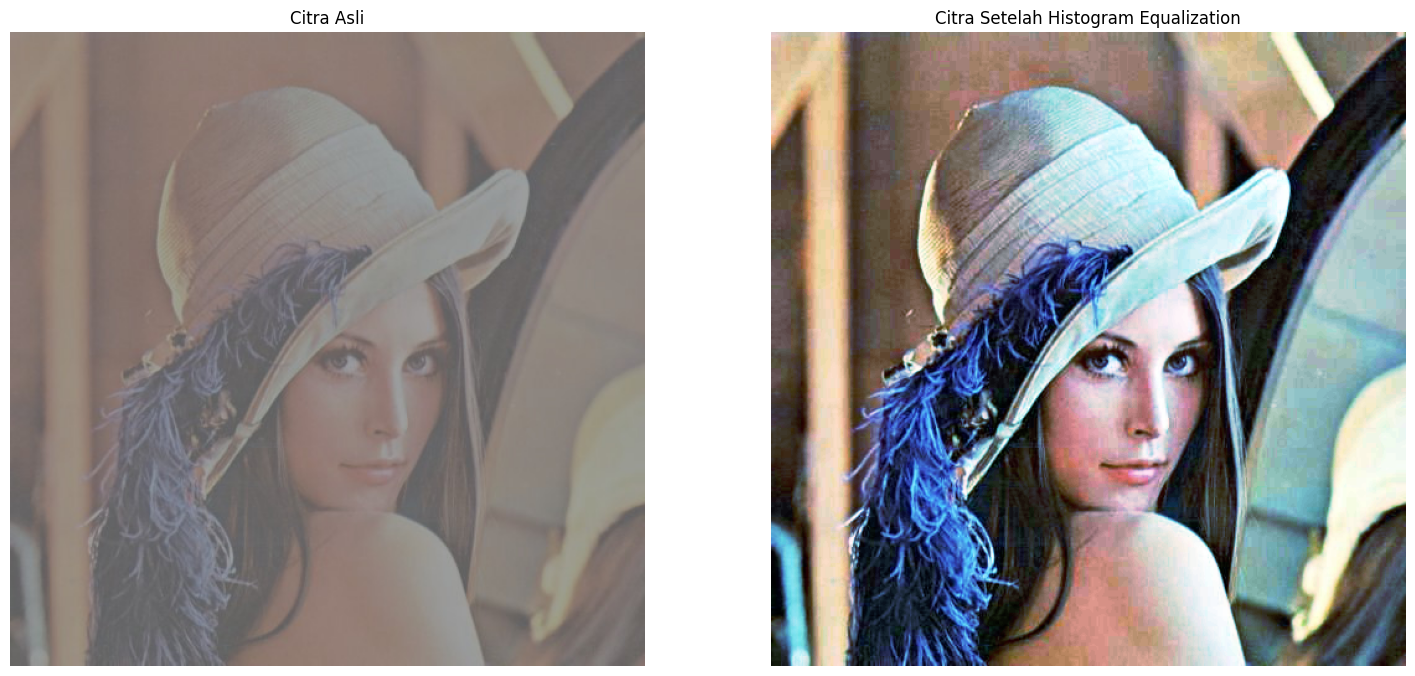

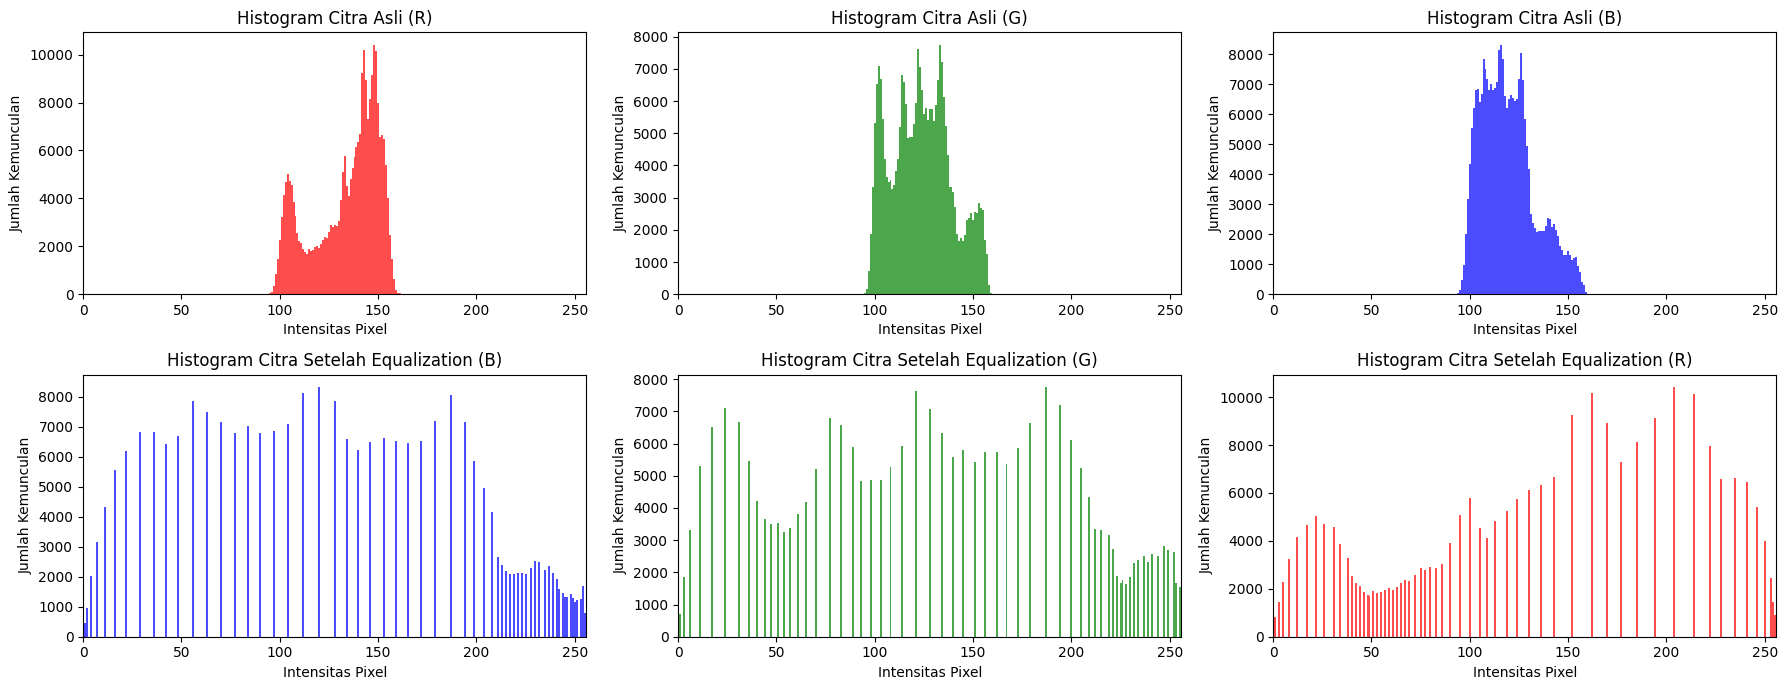

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Langkah 1: Memuat citra 'lena_lc.jpg' dalam format warna
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg'
img = cv.imread(image_path)  # Membaca citra dalam format warna (BGR)

# Langkah 2: Menghitung histogram untuk citra asli
colors = ('b', 'g', 'r')  # Kanal warna (BGR)
hist_original_b = np.histogram(img[:, :, 0], bins=256, range=(0, 256))[0]  # Histogram untuk saluran biru
hist_original_g = np.histogram(img[:, :, 1], bins=256, range=(0, 256))[0]  # Histogram untuk saluran hijau
hist_original_r = np.histogram(img[:, :, 2], bins=256, range=(0, 256))[0]  # Histogram untuk saluran merah

# Langkah 3: Menerapkan histogram equalization pada setiap kanal warna
img_equalized_b = cv.equalizeHist(img[:, :, 0])  # Equalization untuk saluran biru
img_equalized_g = cv.equalizeHist(img[:, :, 1])  # Equalization untuk saluran hijau
img_equalized_r = cv.equalizeHist(img[:, :, 2])  # Equalization untuk saluran merah

# Menggabungkan saluran yang sudah di-equalization
img_equalized = cv.merge([img_equalized_b, img_equalized_g, img_equalized_r])

# Menghitung histogram untuk citra yang sudah di-equalization
hist_equalized_b = np.histogram(img_equalized[:, :, 0], bins=256, range=(0, 256))[0]  # Histogram untuk saluran biru
hist_equalized_g = np.histogram(img_equalized[:, :, 1], bins=256, range=(0, 256))[0]  # Histogram untuk saluran hijau
hist_equalized_r = np.histogram(img_equalized[:, :, 2], bins=256, range=(0, 256))[0]  # Histogram untuk saluran merah

# Langkah 4: Menampilkan citra dan histogram
plt.figure(figsize=(18, 10))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Menampilkan citra setelah equalization
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_equalized, cv.COLOR_BGR2RGB))
plt.title('Citra Setelah Histogram Equalization')
plt.axis('off')

# Menampilkan histogram untuk saluran biru
plt.figure(figsize=(18, 7))

# Menampilkan histogram untuk saluran merah
plt.subplot(2, 3, 1)
plt.bar(np.arange(256), hist_original_r, color='r', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (R)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram untuk saluran hijau
plt.subplot(2, 3, 2)
plt.bar(np.arange(256), hist_original_g, color='g', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (G)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 3)
plt.bar(np.arange(256), hist_original_b, color='b', width=1.0, alpha=0.7)
plt.title('Histogram Citra Asli (B)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')


# Menampilkan histogram setelah equalization untuk saluran merah
plt.subplot(2, 3, 6)
plt.bar(np.arange(256), hist_equalized_r, color='r', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Equalization (R)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram setelah equalization untuk saluran hijau
plt.subplot(2, 3, 5)
plt.bar(np.arange(256), hist_equalized_g, color='g', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Equalization (G)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram setelah equalization untuk saluran biru
plt.subplot(2, 3, 4)
plt.bar(np.arange(256), hist_equalized_b, color='b', width=1.0, alpha=0.7)
plt.title('Histogram Citra Setelah Equalization (B)')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan hasil
plt.tight_layout()
plt.show()


7.  Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


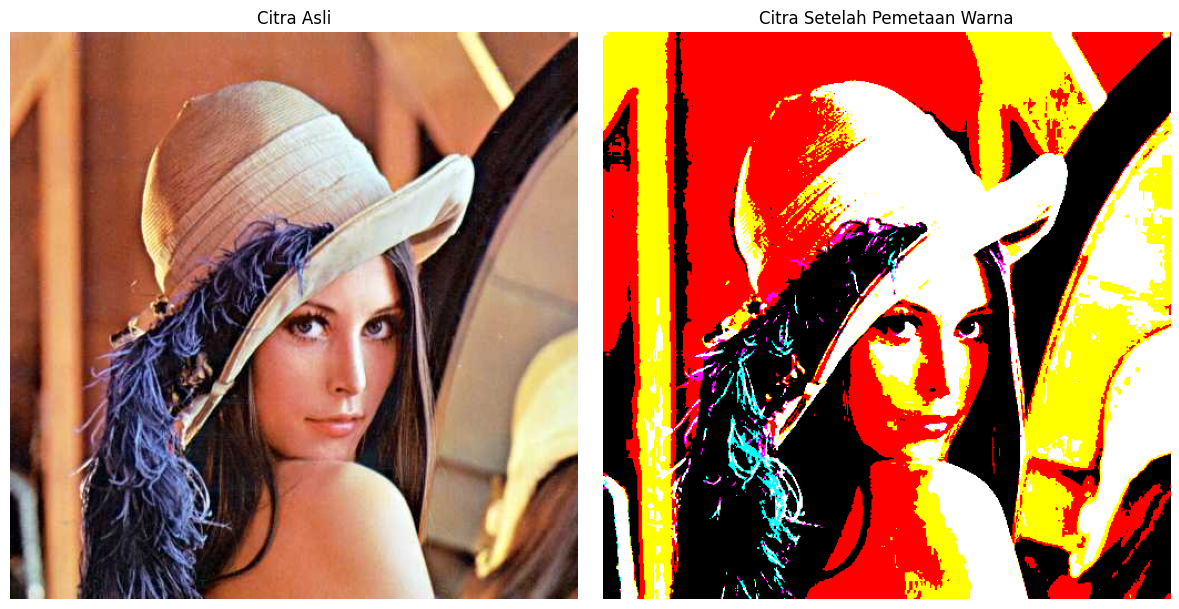

In [ ]:
# Memuat citra ]image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'
img = cv.imread(image_path)

# Mendefinisikan warna target
# Hitam, Hijau, Kuning, Biru, Cyan, Magenta, Putih
colors = np.array([
    [0, 0, 0],         # Hitam
    [0, 255, 0],       # Hijau
    [255, 255, 0],     # Kuning
    [0, 0, 255],       # Biru
    [0, 255, 255],     # Cyan
    [255, 0, 255],     # Magenta
    [255, 255, 255]    # Putih
])

# Menghitung jarak euclidean ke warna target dan memetakan ke warna terdekat
# Membangun citra yang dipetakan
mapped_image = np.zeros_like(img)

# Mendapatkan dimensi citra
height, width, _ = img.shape

for i in range(height):
    for j in range(width):
        # Mengambil warna piksel saat ini
        pixel_color = img[i, j]

        # Menghitung jarak euclidean ke setiap warna target
        distances = np.linalg.norm(colors - pixel_color, axis=1)

        # Menemukan indeks warna target terdekat
        closest_color_index = np.argmin(distances)

        # Mengatur piksel pada citra yang dipetakan dengan warna terdekat
        mapped_image[i, j] = colors[closest_color_index]

#  Menampilkan citra
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mapped_image_rgb = cv.cvtColor(mapped_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)  # Menampilkan citra asli
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped_image_rgb)  # Menampilkan citra setelah pemetaan warna
plt.title('Citra Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

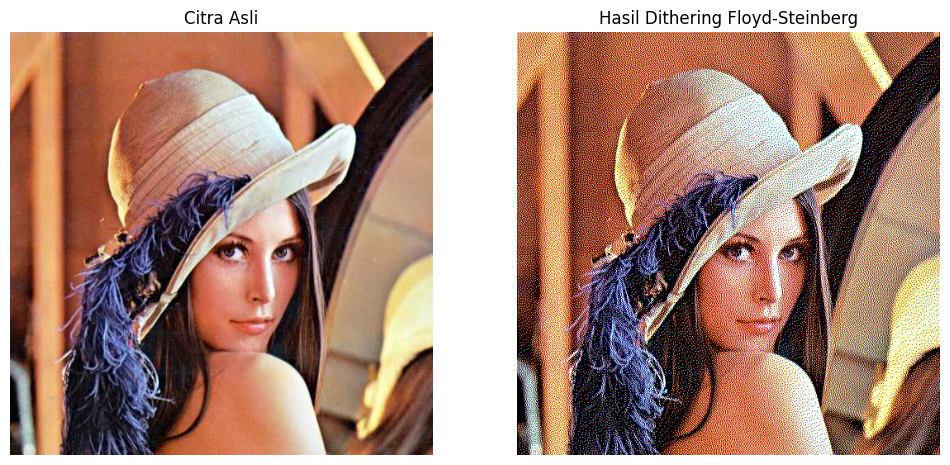

In [ ]:
def threshold(value):
    """Fungsi untuk membatasi nilai antara 0 dan 255."""
    return np.clip(value, 0, 255)  # Menggunakan np.clip untuk membatasi nilai

def floyd_steinberg_dithering(image):
    """Floyd-Steinberg dithering."""
    img = image.copy()
    height, width, _ = img.shape

    # Looping untuk setiap pixel
    for y in range(height):
        for x in range(width):
            pixel_old = img[y, x].astype(float)  # Menggunakan tipe float untuk perhitungan
            jarak_pixel = 1  # Jarak pixel tetangga, minimal 1

            # Menghitung pixel baru berdasar jarak dan batasan warna yang dimiliki
            pixel_new = np.round(jarak_pixel * pixel_old / 255.0) * (255 / jarak_pixel)
            img[y, x] = pixel_new  # Simpan pixel baru

            # Menghitung kuantitasi error
            error = pixel_old - pixel_new

            # Menyebarkan error ke tetangga
            if x + 1 < width:  # RI
                img[y, x + 1] = threshold(img[y, x + 1] + error * 7 / 16)
            if x - 1 >= 0 and y + 1 < height:  # R2
                img[y + 1, x - 1] = threshold(img[y + 1, x - 1] + error * 3 / 16)
            if y + 1 < height:  # R3
                img[y + 1, x] = threshold(img[y + 1, x] + error * 5 / 16)
            if x + 1 < width and y + 1 < height:  # R4
                img[y + 1, x + 1] = threshold(img[y + 1, x + 1] + error * 1 / 16)

    return img

# Membaca citra dari jalur yang ditentukan
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena.jpg'
image = cv2.imread(image_path)

# Cek jika citra berhasil dimuat
if image is None:
    print("Citra tidak berhasil dimuat. Periksa jalur file.")
else:
    # Mengubah citra ke format RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mengaplikasikan dithering
    dithered_image = floyd_steinberg_dithering(image)

    # Menampilkan citra asli dan citra hasil dithering
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Hasil Dithering Floyd-Steinberg')
    plt.imshow(dithered_image.astype(np.uint8))
    plt.axis('off')

    plt.show()


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

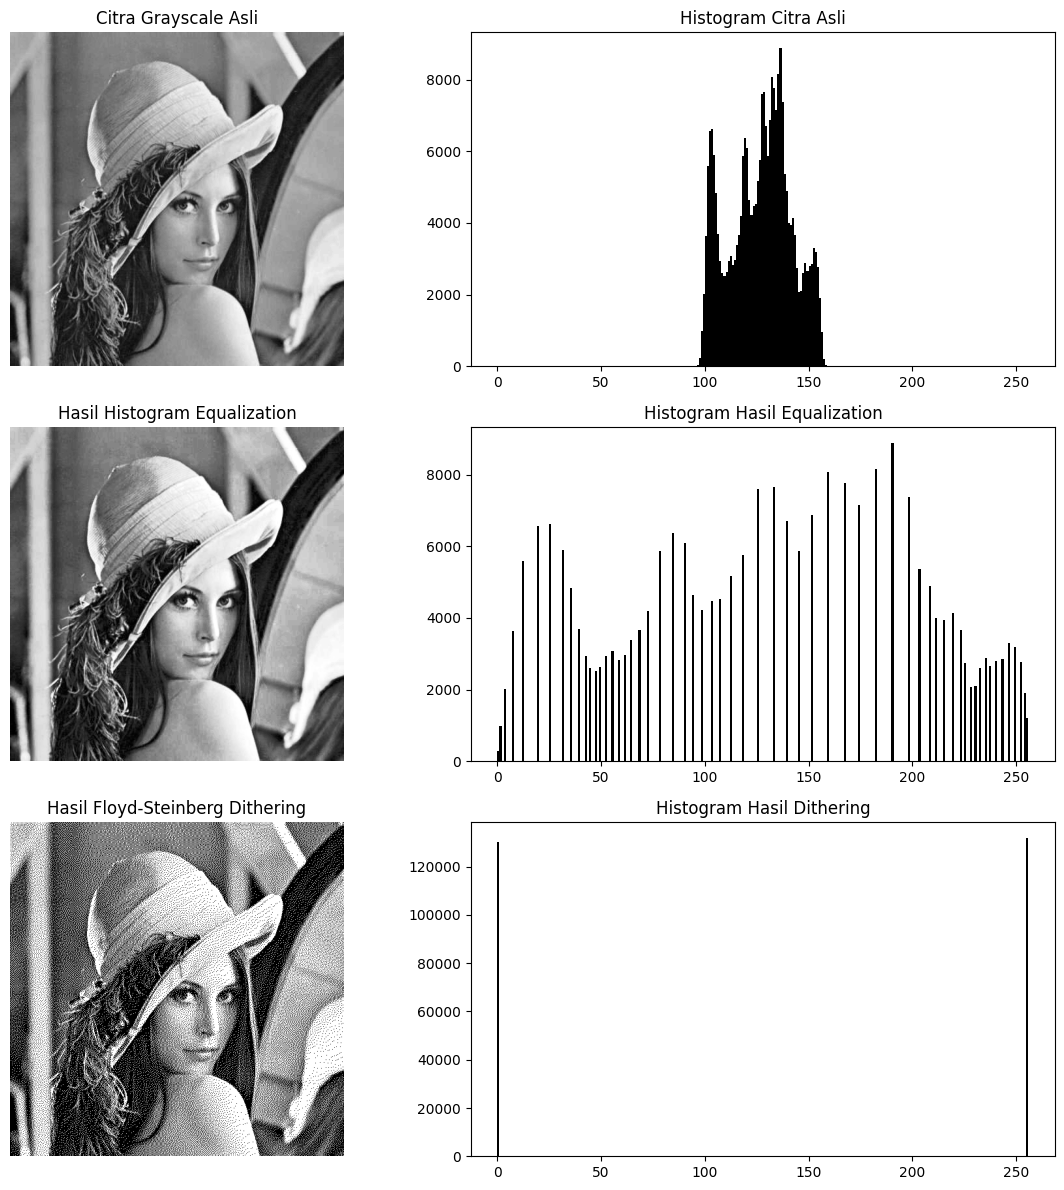

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def floyd_steinberg_dithering(image):
    """Floyd-Steinberg dithering pada citra grayscale."""
    img = image.copy()
    height, width = img.shape

    # Looping untuk setiap pixel
    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x].astype(float)  # Menggunakan tipe float untuk perhitungan
            new_pixel = np.round(old_pixel / 255.0) * 255  # Kuantisasi warna
            img[y, x] = new_pixel  # Simpan pixel baru

            # Menghitung kuantitasi error
            error = old_pixel - new_pixel

            # Menyebarkan error ke tetangga
            if x + 1 < width:  # RI
                img[y, x + 1] = np.clip(img[y, x + 1] + error * 7 / 16, 0, 255)
            if x - 1 >= 0 and y + 1 < height:  # R2
                img[y + 1, x - 1] = np.clip(img[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y + 1 < height:  # R3
                img[y + 1, x] = np.clip(img[y + 1, x] + error * 5 / 16, 0, 255)
            if x + 1 < width and y + 1 < height:  # R4
                img[y + 1, x + 1] = np.clip(img[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return img

# Membaca citra dari jalur yang ditentukan
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menerapkan Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Menerapkan Floyd-Steinberg Dithering
dithered_image = floyd_steinberg_dithering(equalized_image)

# Membuat plot untuk citra dan histogram
plt.figure(figsize=(12, 12))

# Menampilkan citra grayscale asli
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Grayscale Asli')
plt.axis('off')

# Histogram untuk citra grayscale asli
plt.subplot(3, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Citra Asli')

# Menampilkan citra hasil histogram equalization
plt.subplot(3, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Hasil Histogram Equalization')
plt.axis('off')

# Histogram untuk citra hasil histogram equalization
plt.subplot(3, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Hasil Equalization')

# Menampilkan citra hasil dithering
plt.subplot(3, 2, 5)
plt.imshow(dithered_image.astype(np.uint8), cmap='gray')
plt.title('Hasil Floyd-Steinberg Dithering')
plt.axis('off')

# Histogram untuk citra hasil Floyd-Steinberg dithering
plt.subplot(3, 2, 6)
plt.hist(dithered_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Hasil Dithering')

plt.tight_layout()
plt.show()